# Matplotlib

## Object-oriented interface
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

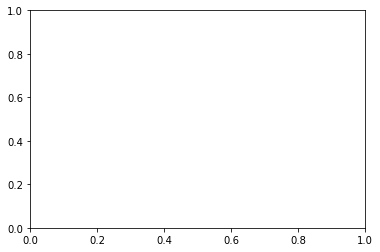

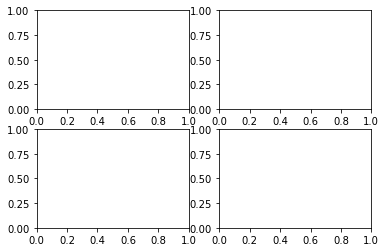

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
plt.show()

fig2, ax2 = plt.subplots(2, 2)
plt.show()

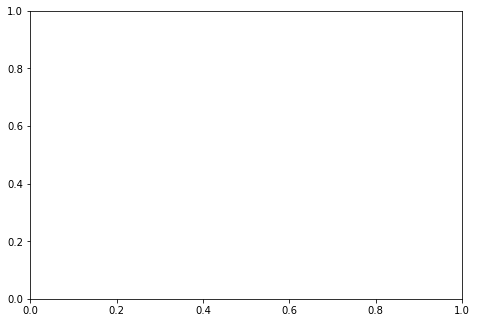

In [2]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

plt.show()

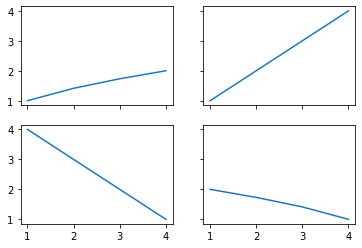

In [3]:
x = np.arange(1, 5)     # [1, 2, 3, 4]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, squeeze=True)
ax[0][0].plot(x, np.sqrt(x))      # left-top
ax[0][1].plot(x, x)               # right-top
ax[1][0].plot(x, -x+5)            # left-bottom
ax[1][1].plot(x, np.sqrt(-x+5))   # right-bottom

plt.show()

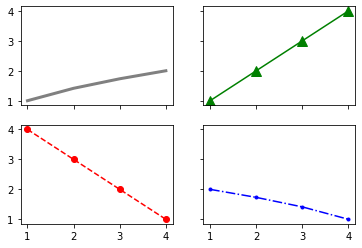

In [4]:
x = np.arange(1, 5)     # [1, 2, 3, 4]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, squeeze=True)
ax[0][0].plot(x, np.sqrt(x), 'gray', linewidth=3)
ax[0][1].plot(x, x, 'g^-', markersize=10)
ax[1][0].plot(x, -x+5, 'ro--')
ax[1][1].plot(x, np.sqrt(-x+5), 'b.-.')

plt.show()

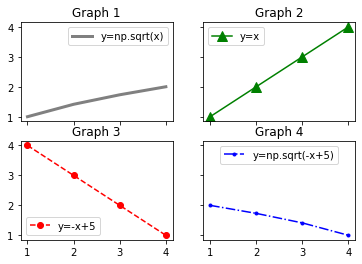

In [5]:
x = np.arange(1, 5)     # [1, 2, 3, 4]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, squeeze=True)
ax[0][0].plot(x, np.sqrt(x), 'gray', linewidth=3, label='y=np.sqrt(x)')
ax[0][0].set_title('Graph 1')
ax[0][0].legend()
ax[0][1].plot(x, x, 'g^-', markersize=10, label='y=x')
ax[0][1].set_title('Graph 2')
ax[0][1].legend(loc='upper left')
ax[1][0].plot(x, -x+5, 'ro--', label='y=-x+5')
ax[1][0].set_title('Graph 3')
ax[1][0].legend(loc='lower left')
ax[1][1].plot(x, np.sqrt(-x+5), 'b.-.', label='y=np.sqrt(-x+5)')
ax[1][1].set_title('Graph 4')
ax[1][1].legend(loc='upper center')

plt.show()

# Term Project Walkthrough

## DataFrame의 길이 출력

## Gold price

In [6]:
from urllib import request

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB == True:
    !wget https://raw.githubusercontent.com/crazytb/schadvmachinelearning/master/gold_price_1979-2021.csv -O gold_price_1979-2021.csv
else:
    url = "https://raw.githubusercontent.com/crazytb/schadvmachinelearning/master/"
    filename = "gold_price_1979-2021.csv"
    request.urlretrieve(url+filename,filename)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("gold_price_1979-2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       511 non-null    object 
 1   United States(USD)         511 non-null    float64
 2   Europe(EUR)                511 non-null    float64
 3   Japan(JPY)                 511 non-null    float64
 4   United Kingdom(GBP)        511 non-null    float64
 5   Canada(CAD)                511 non-null    float64
 6   Switzerland(CHF)           511 non-null    float64
 7   India(INR)                 511 non-null    float64
 8   China(CNY)                 439 non-null    float64
 9   Turkey(TRY)                464 non-null    float64
 10  Saudi Arabia(SAR)          511 non-null    float64
 11  Indonesia(IDR)             511 non-null    float64
 12  United Arab Emirates(AED)  511 non-null    float64
 13  Thailand(THB)              511 non-null    float64

In [8]:
df = df.set_index("Date")

1. csv 파일을 Pandas DataFrame으로 받고, 수집 기간동안의 각 나라별 평균 금 가격을 출력해 보세요.

In [9]:
# Mission 1
print("Mission 1: Average gold prices")
print("--------------------------------")
for name in df.columns:
    print(f"{name}: {df[name].mean():.2f}")

Mission 1: Average gold prices
--------------------------------
United States(USD): 693.70
Europe(EUR): 572.91
Japan(JPY): 82947.79
United Kingdom(GBP): 450.14
Canada(CAD): 843.50
Switzerland(CHF): 826.12
India(INR): 33124.29
China(CNY): 4883.28
Turkey(TRY): 1739.88
Saudi Arabia(SAR): 2580.53
Indonesia(IDR): 6207426.60
United Arab Emirates(AED): 2549.20
Thailand(THB): 21659.53
Vietnam(VND): 15126332.99
Egypt(EGP): 6759.58
South Korean(KRW): 717691.52
Australia(AUD): 869.88
South Africa(ZAR): 5950.80


2. 컴파일하면 나라 이름을 입력받도록 합니다. 이후 최초 생성가격을 100%라고 했을 때, x축은 date, y축은 최초 생성가격에 대한 비율로 꺾은선 그래프를 그려보세요.

0: United States(USD)
1: Europe(EUR)
2: Japan(JPY)
3: United Kingdom(GBP)
4: Canada(CAD)
5: Switzerland(CHF)
6: India(INR)
7: China(CNY)
8: Turkey(TRY)
9: Saudi Arabia(SAR)
10: Indonesia(IDR)
11: United Arab Emirates(AED)
12: Thailand(THB)
13: Vietnam(VND)
14: Egypt(EGP)
15: South Korean(KRW)
16: Australia(AUD)
17: South Africa(ZAR)


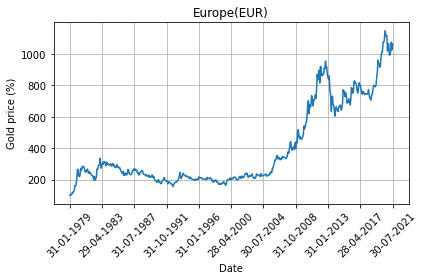

In [10]:
# Mission 2
while True:
    for idx, name in enumerate(df.columns):
        print(f"{idx}: {name}")
    val = int(input("Select country number: "))
    if (val > -1) & (val < len(df.columns)):
        break
    else:
        print("Input number again.")

country_name = df.columns[val]
t = df.index[pd.notnull(df[country_name])]
x = np.arange(t.size)
y = df[country_name][pd.notnull(df[country_name])]
y = 100*y/y.iloc[0]
plt.figure(1)
plt.plot(x, y)
plt.xticks(x[::int(t.size/10)], labels=t[::int(t.size/10)], rotation=45)
plt.xlabel("Date")
plt.ylabel(f"Gold price (%)")
plt.title(f"{country_name}")
plt.grid()
plt.tight_layout()
plt.savefig("gold_mission2.pdf")

3. 시점 x의 Maximum Drawdown (MDD)은 아래와 같이 정의됩니다.

MDD_x = (x시점 이전의 최고가 - x시점의 가격) / x시점의 가격

x축은 date, y축은 한국(South Korea)의 MDD로 꺾은선 그래프를 그려보세요.

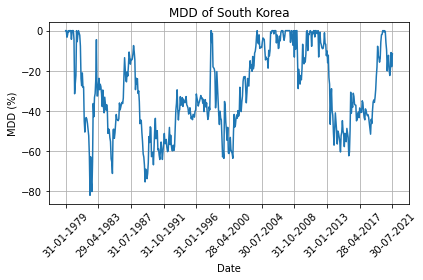

In [11]:
# Mission 3
t = df.index[pd.notnull(df['South Korean(KRW)'])]
x = np.arange(t.size)
y = df[country_name][pd.notnull(df['South Korean(KRW)'])]
mdd_x = [100*(df['South Korean(KRW)'][ind]-df['South Korean(KRW)'][0:ind+1].max())/df['South Korean(KRW)'][ind] for ind in x]
plt.figure(2)
plt.plot(x, mdd_x)
plt.xticks(x[::int(t.size/10)], labels=t[::int(t.size/10)], rotation=45)
plt.xlabel("Date")
plt.ylabel(f"MDD (%)")
plt.title(f"MDD of South Korea")
plt.grid()
plt.tight_layout()
plt.savefig("gold_mission3.pdf")

4. csv 파일에 포함된 나라들 중 금가격의 변동성에 대해 나름대로 분석해 보고 결론을 내려보세요.

In [12]:
# Mission 4
std = df.std(axis=0)
print("Print out std. dev. in descending order.")
for ind, name in enumerate(df.std(axis=0).sort_values(ascending=False).index):
    print(f"{ind+1}: {name}")


Print out std. dev. in descending order.
1: Vietnam(VND)
2: Indonesia(IDR)
3: South Korean(KRW)
4: Japan(JPY)
5: India(INR)
6: Thailand(THB)
7: Egypt(EGP)
8: South Africa(ZAR)
9: China(CNY)
10: Turkey(TRY)
11: Saudi Arabia(SAR)
12: United Arab Emirates(AED)
13: Australia(AUD)
14: Canada(CAD)
15: United States(USD)
16: Europe(EUR)
17: Switzerland(CHF)
18: United Kingdom(GBP)


## Netflix titles

In [13]:
from urllib import request

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB == True:
    !wget https://raw.githubusercontent.com/crazytb/schadvmachinelearning/master/netflix_titles.csv -O netflix_titles.csv
else:
    url = "https://raw.githubusercontent.com/crazytb/schadvmachinelearning/master/"
    filename = "netflix_titles.csv"
    request.urlretrieve(url+filename,filename)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv("netflix_titles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1000 non-null   object
 1   type          1000 non-null   object
 2   title         1000 non-null   object
 3   director      685 non-null    object
 4   cast          903 non-null    object
 5   country       694 non-null    object
 6   date_added    1000 non-null   object
 7   release_year  1000 non-null   int64 
 8   rating        1000 non-null   object
 9   duration      1000 non-null   object
 10  listed_in     1000 non-null   object
 11  description   1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 93.9+ KB


In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25.Sep.21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24.Sep.21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24.Sep.21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24.Sep.21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24.Sep.21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


1. csv 파일을 Pandas DataFrame으로 받습니다. 연도를 입력할 수 있도록 하고, 입력한 연도에 출시(release_year)된 작품의 수를 출력하세요.

In [16]:
# Mission 1
print("Mission 1: The number of movies according to year input")
year = int(input(f"Input year, from {df.release_year.min()} to {df.release_year.max()}."))
while 1:
    if year < df.release_year.min() or year > df.release_year.max():
        print("Please insert an appropriate year.")
    elif year not in df.release_year.value_counts().index:
        print(f"The number of movies released in {year} is 0.")
        break
    else:
        print(f"The number of movies released in {year} is {df.release_year.value_counts()[year]}.")
        break


Mission 1: The number of movies according to year input
The number of movies released in 2015 is 31.


2. 연도 별 작품 수를 막대 그래프로 그려보세요.

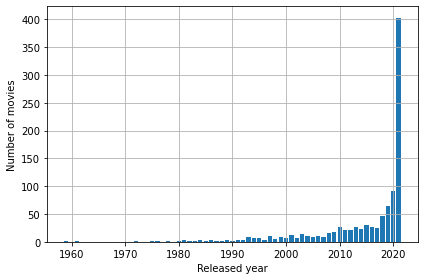

In [17]:
# Mission 2
t = df.release_year.value_counts().sort_index().index
y = df.release_year.value_counts().sort_index().values
plt.figure(1)
plt.bar(t, y)
plt.xlabel("Released year")
plt.ylabel("Number of movies")
plt.grid()
plt.tight_layout()
plt.savefig("netflix_mission2.pdf")
# plt.show()


3. 작품의 수가 많은 순서대로 나라(country)를 출력하고, 해당 나라에서 출시한 작품의 수를 나라의 이름와 함께 각각 출력하세요.

United States, 385
United Kingdom, 68
India, 61
Canada, 39
Japan, 35
France, 34
Germany, 25
Australia, 19
Nigeria, 19
Spain, 18
Turkey, 17
South Korea, 13
Italy, 12
Mexico, 11
China, 10
Argentina, 9
South Africa, 7
Belgium, 6
New Zealand, 6
Brazil, 6
Thailand, 6
Colombia, 5
Taiwan, 5
Romania, 4
Hong Kong, 4
Israel, 4
Egypt, 4
Denmark, 4
Netherlands, 4
Lebanon, 4
United Arab Emirates, 4
Czech Republic, 3
Singapore, 3
Russia, 3
Poland, 3
Indonesia, 3
Philippines, 3
Finland, 2
, 2
Ireland, 2
Switzerland, 2
Bulgaria, 2
Vietnam, 2
Sweden, 2
Syria, 2
Ghana, 1
Burkina Faso, 1
Ethiopia, 1
Venezuela, 1
Nepal, 1
Greece, 1
Jordan, 1
Algeria, 1
Saudi Arabia, 1
Kuwait, 1
Malaysia, 1
Hungary, 1
Iceland, 1
Norway, 1
Qatar, 1
Mauritius, 1
Austria, 1


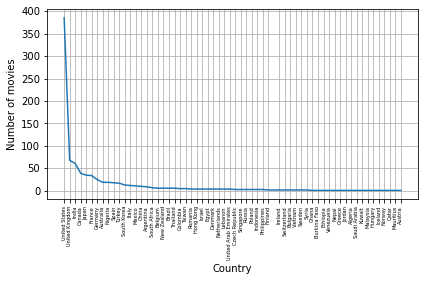

In [18]:
# Mission 3
country_lst_nested = list(df.country[df.country.notnull()])
country_lst = []
for country in country_lst_nested:
    country_lst.extend(country.split(', '))

for k, v in Counter(country_lst).most_common():
    print(f"{k}, {v}")

df_country = pd.DataFrame(Counter(country_lst).most_common(), columns=['Country', 'Number'])
df_country = df_country[df_country.Country != '']
x = df_country.index
plt.figure(2)
plt.plot(x, df_country.Number)
plt.xticks(x, labels=df_country.Country, rotation=90, fontsize=5)
plt.xlabel("Country")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.grid()
plt.savefig("netflix_mission3.pdf")


4. 작품들의 설명(description)을 참고하여, 모든 넷플릭스 작품들에 많이 나타나는 키워드를 추출해 보세요.

In [19]:
# Mission 4
import nltk  
from nltk.corpus import stopwords

desc_lst_nested = list(df.description)
desc_lst_nested = [desc.lower() for desc in desc_lst_nested]

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/sun/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
desc_lst = []
for word in desc_lst_nested:
    word.replace('.', ' ')
    word.replace(',', ' ')
    word.replace('?', ' ')
    word.replace('"', ' ')
    word.replace('_', ' ')
    word.replace('-', ' ')
    word.lower()
    desc_lst.extend(word.split(' '))

desc_lst = [x for x in desc_lst if x not in stopwords.words('english')]
desc_lst


['father',
 'nears',
 'end',
 'life,',
 'filmmaker',
 'kirsten',
 'johnson',
 'stages',
 'death',
 'inventive',
 'comical',
 'ways',
 'help',
 'face',
 'inevitable.',
 'crossing',
 'paths',
 'party,',
 'cape',
 'town',
 'teen',
 'sets',
 'prove',
 'whether',
 'private-school',
 'swimming',
 'star',
 'sister',
 'abducted',
 'birth.',
 'protect',
 'family',
 'powerful',
 'drug',
 'lord,',
 'skilled',
 'thief',
 'mehdi',
 'expert',
 'team',
 'robbers',
 'pulled',
 'violent',
 'deadly',
 'turf',
 'war.',
 'feuds,',
 'flirtations',
 'toilet',
 'talk',
 'go',
 'among',
 'incarcerated',
 'women',
 'orleans',
 'justice',
 'center',
 'new',
 'orleans',
 'gritty',
 'reality',
 'series.',
 'city',
 'coaching',
 'centers',
 'known',
 'train',
 'india?_',
 'finest',
 'collegiate',
 'minds,',
 'earnest',
 'unexceptional',
 'student',
 'friends',
 'navigate',
 'campus',
 'life.',
 'arrival',
 'charismatic',
 'young',
 'priest',
 'brings',
 'glorious',
 'miracles,',
 'ominous',
 'mysteries',
 'renewed

In [23]:
for k, v in Counter(desc_lst).most_common():
    print(f"{k}, {v}")

new, 84
life, 66
young, 64
must, 61
friends, 59
family, 57
two, 49
world, 45
love, 44
woman, 42
man, 41
group, 41
one, 41
??and, 38
find, 38
three, 38
takes, 38
teen, 37
back, 34
home, 33
take, 32
help, 31
finds, 31
school, 31
save, 30
get, 29
high, 27
team, 26
becomes, 26
true, 25
first, 25
series, 25
soon, 24
make, 24
follows, 23
couple, 22
years, 22
lives, 22
sets, 21
best, 21
comes, 21
based, 21
tries, 21
documentary, 21
crime, 20
every, 20
gets, 20
daughter, 20
fight, 19
become, 19
mission, 19
turns, 19
together, 19
girl, 19
returns, 18
war, 18
protect, 17
series., 17
student, 17
falls, 17
evil, 17
mysterious, 17
bheem, 17
powerful, 16
drug, 16
little, 16
five, 16
day, 16
he's, 16
learn, 16
agent, 16
human, 16
murder, 16
dark, 16
face, 15
town, 15
go, 15
women, 15
american, 15
real, 15
makes, 15
keep, 15
win, 15
journey, 15
social, 15
secret, 15
old, 15
who's, 14
four, 14
fun, 14
friend, 14
son, 14
powers, 14
leads, 14
??but, 14
come, 14
unexpected, 14
run, 14
crew, 14
behind, 14
